In [156]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [157]:
tf.reset_default_graph()

# Load Data

In [158]:
stock_data_df = pd.read_csv(open('./dataset/lstm_stock_pred_v1.csv'))
stock_data_df.describe()

,Price
count,6111.000000
mean,1792.681641
std,1060.552164
min,99.980000
25%,1111.770000
50%,1583.760000
75%,2312.995000
max,6124.040000


# Data pre-processing

In [159]:
data = stock_data_df["Price"]
data = np.array(data[::-1])
print(data.shape)

(6111,)


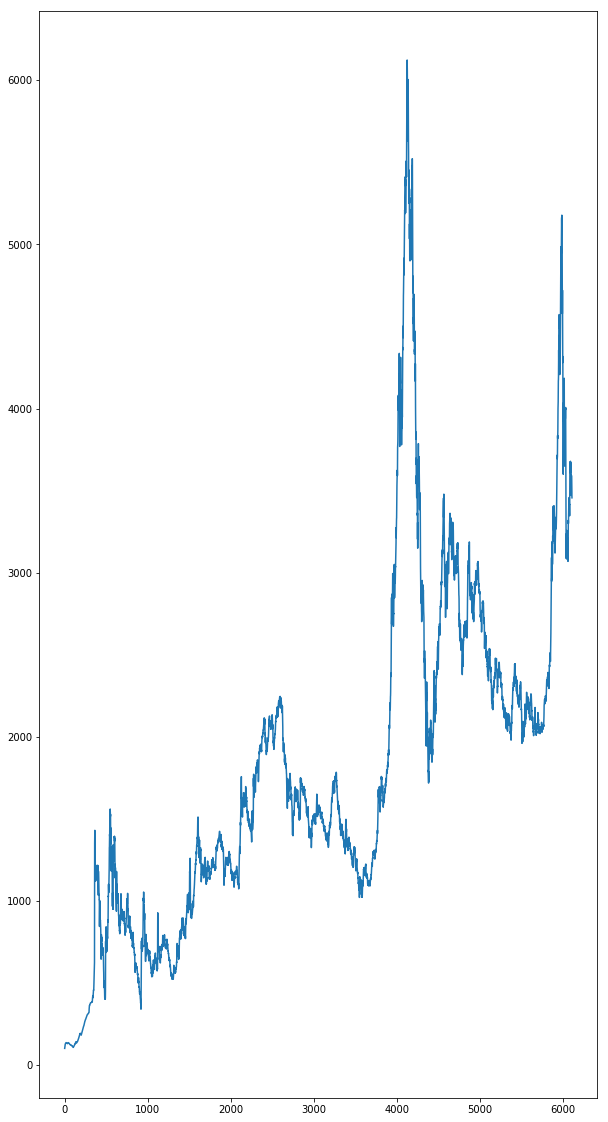

In [160]:
index = [i for i in range(data.shape[0])]

plt.figure(figsize=(10,20))
plt.plot(index, data)
plt.show()

In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(data.shape[0], 1))

In [162]:
steps = 20
latent_dim = 10
batch_size = 7
input_size = 1
output_size = 1
lr = 0.0006

In [163]:
X_train,Y_train=[],[]

for i in range(len(data)-steps-1):
    x = data[i:i+steps]
    X_train.append(x.tolist())
    y = data[i+1:i+steps+1]
    Y_train.append(y.tolist()) 

# Define NN

In [164]:
X = tf.placeholder(tf.float32, [None, steps, input_size])
Y = tf.placeholder(tf.float32, [None, steps, output_size])
weights = {"in": tf.Variable(tf.random_normal([input_size, latent_dim])),
           "out": tf.Variable(tf.random_normal([latent_dim, 1]))}
biases =  {"in": tf.Variable(tf.constant(0.1, shape=[latent_dim,])),
           "out": tf.Variable(tf.constant(0.1, shape=[1,]))}

In [165]:
def lstm(batch):
    w_in = weights["in"]
    b_in = weights["in"]
    
    input_unit = tf.reshape(X, [-1, input_size])
    input_rnn = tf.matmul(input_unit, w_in) + b_in
    input_rnn = tf.reshape(input_rnn, [-1, steps, latent_dim])
    cell = tf.nn.rnn_cell.BasicLSTMCell(latent_dim)
    init_states = cell.zero_state(batch, dtype=tf.float32)
    output_rnn, final_states = tf.nn.dynamic_rnn(cell, input_rnn, initial_state=init_states, dtype=tf.float32)
    output = tf.reshape(output_rnn, [-1, latent_dim])
    w_out = weights["out"]
    b_out = biases["out"]
    predictions = tf.matmul(output, w_out) + b_out
    
    return predictions, final_states

In [166]:
print(len(X_train))

6090


In [167]:
def train_lstm():
    global batch_size
    
    predictions, final_states = lstm(batch_size)
    
    loss = tf.reduce_mean(tf.square(tf.reshape(predictions, [-1]) - tf.reshape(Y, [-1])))
    optimizer = tf.train.AdamOptimizer(lr).minimize(loss)
    
    saver = tf.train.Saver(tf.global_variables())
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(10):
            step = 0
            start = 0
            end = start + batch_size
            while( end < len(X_train)):
                _, loss_ = sess.run([optimizer,loss],feed_dict={X:X_train[start:end],Y:Y_train[start:end]})
                start += batch_size
                end = start + batch_size
                
                if(step % 20 == 0):
                    print(i, step, loss_)
                    print(saver.save(sess, "./lstm_stock_pred_v1.model"))
                    
                step += 1

In [168]:
def prediction():
    prediction, final_states = lstm(1)
    saver=tf.train.Saver(tf.global_variables())
    
    with tf.Session() as sess:
        saver.restore(sess, module_parameters = tf.train.lastest_checkpoint("./lstm_stock_pred_v1.model"))
        
        prev_seq = X_train[-1]
        predictions = []
        for i in range(100):
            next_seq = sess.run(prediction, feed_dict={X:[prev_seq]})
            predict.append(next_seq[-1])
            prev_seq = np.vstack((prev_seq[1:], next_seq[-1]))
        
        plt.figure(figSize=(10,20))
        plt.plot(list(range(len(X_train))), X_train, "red")
        plt.plot(list(range(len(X_train), len(X_train) + len(predictions))), predictions, "blue")
        plt.show()

In [169]:
train_lstm()
prediction() 

0 0 0.27550587
./lstm_stock_pred_v1.model
0 20 0.022032538
./lstm_stock_pred_v1.model
0 40 0.0045137918
./lstm_stock_pred_v1.model
0 60 0.002744109
./lstm_stock_pred_v1.model
0 80 0.0012216836
./lstm_stock_pred_v1.model
0 100 0.0010091398
./lstm_stock_pred_v1.model
0 120 0.0014489974
./lstm_stock_pred_v1.model
0 140 0.00087884266
./lstm_stock_pred_v1.model
0 160 0.00056910515
./lstm_stock_pred_v1.model
0 180 0.00041150648
./lstm_stock_pred_v1.model
0 200 0.00028949458
./lstm_stock_pred_v1.model
0 220 2.7250906e-05
./lstm_stock_pred_v1.model
0 240 4.398268e-05
./lstm_stock_pred_v1.model
0 260 9.192331e-05
./lstm_stock_pred_v1.model
0 280 0.00019356067
./lstm_stock_pred_v1.model
0 300 0.000681896
./lstm_stock_pred_v1.model
0 320 0.00054429885
./lstm_stock_pred_v1.model
0 340 0.0007598262
./lstm_stock_pred_v1.model
0 360 0.0003530363
./lstm_stock_pred_v1.model
0 380 0.000354535
./lstm_stock_pred_v1.model
0 400 8.3270934e-05
./lstm_stock_pred_v1.model
0 420 0.00016348096
./lstm_stock_pred_

./lstm_stock_pred_v1.model
4 60 0.0045384415
./lstm_stock_pred_v1.model
4 80 0.002237137
./lstm_stock_pred_v1.model
4 100 0.00010959473
./lstm_stock_pred_v1.model
4 120 0.0009037725
./lstm_stock_pred_v1.model
4 140 9.887592e-05
./lstm_stock_pred_v1.model
4 160 0.00043209508
./lstm_stock_pred_v1.model
4 180 0.00065322674
./lstm_stock_pred_v1.model
4 200 0.000583257
./lstm_stock_pred_v1.model
4 220 3.015525e-05
./lstm_stock_pred_v1.model
4 240 0.00045361576
./lstm_stock_pred_v1.model
4 260 0.00031965104
./lstm_stock_pred_v1.model
4 280 1.8406463e-05
./lstm_stock_pred_v1.model
4 300 0.0013463274
./lstm_stock_pred_v1.model
4 320 0.00086379296
./lstm_stock_pred_v1.model
4 340 0.00010581091
./lstm_stock_pred_v1.model
4 360 9.561955e-05
./lstm_stock_pred_v1.model
4 380 0.0023241283
./lstm_stock_pred_v1.model
4 400 0.00016021174
./lstm_stock_pred_v1.model
4 420 0.000526984
./lstm_stock_pred_v1.model
4 440 0.00011641777
./lstm_stock_pred_v1.model
4 460 0.0018388731
./lstm_stock_pred_v1.model
4 

./lstm_stock_pred_v1.model
8 120 0.0003621249
./lstm_stock_pred_v1.model
8 140 0.00018292776
./lstm_stock_pred_v1.model
8 160 8.055641e-05
./lstm_stock_pred_v1.model
8 180 0.00034240953
./lstm_stock_pred_v1.model
8 200 0.00095594896
./lstm_stock_pred_v1.model
8 220 2.8181938e-05
./lstm_stock_pred_v1.model
8 240 0.00037287845
./lstm_stock_pred_v1.model
8 260 0.00048270024
./lstm_stock_pred_v1.model
8 280 0.00010413022
./lstm_stock_pred_v1.model
8 300 0.0017086795
./lstm_stock_pred_v1.model
8 320 0.0011147616
./lstm_stock_pred_v1.model
8 340 0.0008512113
./lstm_stock_pred_v1.model
8 360 0.00014933261
./lstm_stock_pred_v1.model
8 380 0.0025075057
./lstm_stock_pred_v1.model
8 400 0.00032635636
./lstm_stock_pred_v1.model
8 420 0.0010076495
./lstm_stock_pred_v1.model
8 440 3.9372775e-05
./lstm_stock_pred_v1.model
8 460 0.001232312
./lstm_stock_pred_v1.model
8 480 0.0011379181
./lstm_stock_pred_v1.model
8 500 2.1016047e-05
./lstm_stock_pred_v1.model
8 520 8.094362e-06
./lstm_stock_pred_v1.mod

ValueError: Tensor("rnn/Const:0", shape=(1,), dtype=int32) must be from the same graph as Tensor("ExpandDims:0", shape=(1,), dtype=int32).